# Exercise 2: Color mixing and optimization with the LEGO bot

This is the second full color mixing exercise in the course Autonomous materials discovery (47332).

In this exercise you will explore the software used to control the LEGO bots. You will mix water colored with food coloring with the bots, visualize the output and run a simple optimization. 

This exercise builds heavily on exercise 1. Where exercise 1 could be completed individually, you have to work as a group for this exercise. Only one of you can run python scripts on the robot at a time. You should all try to run the robot at some point. Communication, sharing of results, and screen sharing will be important. There might be some wait time during this exercise. You can watch the camera and enjoy the sight of the LEGO robot working. You can also get started with or work on your group report.  

Should you fail to finish this exercise within the time frame, there will be a chance to catch up later on, but try not to fall behind. 


# Exercise 2.1: Get familiar with robot control software

You will start by looking at the python code used to control the robot. As already mentioned, the control class consists of two classes, one controlled by you and one working locally on the robot computer. They are called `AiLEGO_master` and `AiLEGO_robot`, respectively. Unless you really want to get your hands dirty, you will spend most of your time with the `AiLEGO_master` class. Start by loading it in.

In [1]:
from ailego_master import AiLEGO_master
import matplotlib.pyplot as plt
import numpy as np

Take a look at the docstring for it just like you did for the *in silico* model in exercise 1. When you know and understand what inputs it can take during initialization, lets try to look at the methods (like functions but in the class) available. A neat way to do this within the notebook is to type the module name followed by a period, `.`, and then pressing `Tab`. You should be able to see all the methods in the class. Note that the cell will give you an error if you try to run it.

In [2]:
# AiLEGO_master.  # remove the # in front when looking at methods

You see the `make_robot_talk` method, that you have already used. Most of the methods you will rarely call directly. Instead they serve in the execution of other methods and during initialization. Two methods that you *will* use are `run_cuvette`,  `set_first_empty_cuvette`, and `get_next_cuvette`. Use the cells below to type in the methods after the period, place cursor in that line, and use `Shift` + `Tab` to access method docstrings. See what they do, what input they take and what they return if anything. We cannot run the methods yet. We do not yet have an instance of the class, which is what `self` refers to.

In [3]:
# AiLEGO_master. ...  # remove the # in front when looking at method Docstring
# AiLEGO_master. ...  # remove the # in front when looking at method Docstring
# AiLEGO_master. ...  # remove the # in front when looking at method Docstring

In [4]:
# Teacher
# AiLEGO_master.set_first_empty_cuvette()
# AiLEGO_master.get_next_cuvette()
# AiLEGO_master.run_cuvette()

Notice how `run_cuvette` is very similar to the `run_cuvette` method in `SilicoColorMixer`.

Next, try to initialize an instance of the `AiLEGO_master` class. When you are initializing with `speak_only=False`, which is the default, the initialiation process is much longer. Part of it is just confirming that the robot is in its starting positions with the syringe up, the plunger down, color cartridges filled, and cuvettes empty. The robot will use the touch sensor on the right to determine the `x` position, i.e. the position of the wagon. The last part of the initialization is confirming that the cuvettes, resevoirs, etc. are located where the robot expects them to be. A small python program testing the positions will run on the robot if you answer `y` to test positions. If you can see that the syringe is not hitting the different vessels properly, you can change positions by a constant offset value. It will normally be between -0,5 and 0.5. 0.53 is the distance between two cuvettes. You might not have to test positions every time you initialize an instance of the `AiLEGO_master` class. There is no need to do anything if the optimal offset is 0. For non-zero values, you can specify offset as a keyword argument in the `run_cuvette` function even if you did not test positions during initialization. 

You should not be more than one person initializing at a time. If you do you are likely to experience error messages.

Note that the color codes you obtain are not directly transferable to RGB codes. You will thus see a different color than the real life one if you try to vizualize the RGB code.

Initialize a mixer and test the positions. You can give the instance an ID, if you so desire. It will make it easier to locate your data later on. 

In [5]:
lego_mixer = AiLEGO_master(colors=['red_u', 'green_u', 'blue_t', 'yellow_u'])

Input robot nameailego1
Robot password:········
Verify that syringe is at the top positon and the plunger fully pressed. Then press ENTER
Verify that color cartridges are filled and cuvettes empty (#5 can be filled). Then press ENTER
Do you want to test positions? (y/n): n


In [2]:
# Teachers
lego_mixer = AiLEGO_master(local_ssh=True, colors=['red_u', 'green_u', 'blue_t', 'yellow_u'])

Input robot nameailego1
Robot password:········
Verify that syringe is at the top positon and the plunger fully pressed. Then press ENTER
Verify that color cartridges are filled and cuvettes empty (#5 can be filled). Then press ENTER
Do you want to test positions? (y/n): y
Are positions okay? (y/n): y


You should now have working access to the robot. A .log file with a name identical to the ID of the instance should have been created. It will by default be located in the data subfolder of the course folder. Alternatively it will be in the folder you were in when launced jupyter notebook.

Now you should try to mix some colors using the `run_cuvette` function. The process is similar to exercise 1, so you should use the same visualization methods. Keep track of which cuvette will be filled if no cuvette number is specified in `run_cuvette`. You should naturally make sure that the cuvette you are about to mix to is empty. If you do not specify any cuvette and do not use `set_first_empty_cuvette`, cuvettes will be filled in the order, 1, 2, 3, 4, 6, 7, 8, 9, 10. Note that 5 is missing. It is reserved for the target color. If you try to mix in cuvette 5, you will mix in cuvette 6 instead.

Why do you think we use cuvette 5 for our target color and not cuvette 1 or 10?

To avoid accidentally mixing in an already filled cuvette, it is good practice to make sure there are never a filled cuvette to the right, i.e. with a larger index, than the one you just mixed in. Again, cuvette 5 is an exception to this.

It will take a while from the time the command is executed to the robot actually starts moving.

Enough talk. Show me what you got!

In [3]:
lego_mixer.get_next_cuvette()

1

In [4]:
import matplotlib.pyplot as plt
import numpy as np

(96, 22, 50)


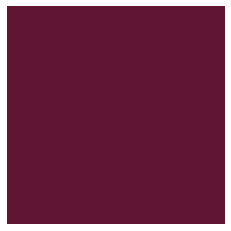

In [5]:
input_volumes=[1.0, 0.0, 0.0, 0.0]
output_color = lego_mixer.run_cuvette(input_volumes)
print(output_color)
plt.axis('off')
plt.imshow(np.array([[output_color]], dtype=np.uint8))

Do some different mixing of colors now. Maybe try to skip a cuvette using the `set_first_empty_cuvette` method or directly specifying the cuvette in `run_cuvette`. If you do the latter, make sure you use `get_next_cuvette` and `set_first_empty_cuvette` afterwards to get the instance back on track. Have different group membets try. Have the teacher in the lab empty cuvettes for you and refill colors when they run low. You can speak directly to the teacher in the lab using the camera.

In [ ]:
# For you to play with

In [ ]:
# For you to play with

In [ ]:
# For you to play with. Add more as needed

2
(30, 32, 57)


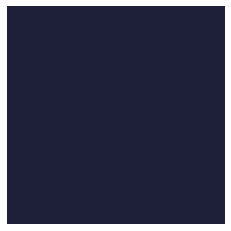

In [6]:
# Teacher
print(lego_mixer.get_next_cuvette())
output_color = lego_mixer.run_cuvette([0.1, 0.1, 0.1, 0.1], cuvette=3)
print(output_color)
plt.axis('off')
plt.imshow(np.array([[output_color]], dtype=np.uint8))

In [7]:
# Teacher
print(lego_mixer.get_next_cuvette())
lego_mixer.set_first_empty_cuvette(5)
print(lego_mixer.get_next_cuvette())

3
5


(32, 34, 54)


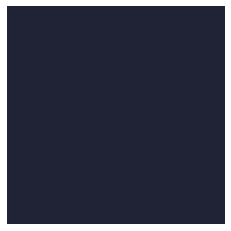

In [8]:
# Teacher
output_color = lego_mixer.run_cuvette([0.1, 0.1, 0.1, 0.1])
print(output_color)
plt.axis('off')
plt.imshow(np.array([[output_color]], dtype=np.uint8))

In [9]:
# Teacher
print(lego_mixer.get_next_cuvette())

7


Try mixing the same color multiple times to get an idea about the noise in the system.

# Exercise 2.2: Difference to target

Just like you did with the `SilicoColorMixer`, you will now try to quantify the difference between a color you have mixed and a target color. Use the same vizualization methods as in exercise 1. Reuse or improve the "score" function you made. 

In [10]:
# For you to play with

In [11]:
# For you to play with

In [12]:
# For you to play with

In [13]:
# For you to play with

In [14]:
# For you to play with. Add more as needed

In [16]:
# Teacher
lego_mixer_w_target = AiLEGO_master(local_ssh=True, colors=['red_u', 'green_u', 'blue_t', 'yellow_u'])

Input robot nameailego1
Robot password:········
Verify that syringe is at the top positon and the plunger fully pressed. Then press ENTER
Verify that color cartridges are filled and cuvettes empty (#5 can be filled). Then press ENTER
Do you want to test positions? (y/n): n


In [17]:
# Teacher
def root_sum_sqr_err(input1, input2):
    """The sum of squared difference between input colors"""
    dif = np.asarray(input1)- np.asarray(input2)
    return (sum(dif**2)**(0.5))

In [18]:
# Teacher
data = []  # empty list for data. Run only once

for input_volumes in [[1., 0., 0., 1.0,], [1., 0.5, 0.5, 1.0,], [0.1, 0.5, 1.5, 0.0,]]:
    color, target = lego_mixer_w_target.run_cuvette(input_volumes, read_target=True)
    print(color, target)
    score = root_sum_sqr_err(color, target)
    data.append([score, input_volumes])

(78, 22, 42) (71, 30, 38)
(34, 29, 48) (71, 30, 38)
(30, 71, 128) (70, 29, 39)


In [19]:
# Teacher
print(data)

[[11.357816691600547, [1.0, 0.0, 0.0, 1.0]], [38.34057902536163, [1.0, 0.5, 0.5, 1.0]], [106.23088063270491, [0.1, 0.5, 1.5, 0.0]]]


In [20]:
# Teacher
from plot_pie_charts import make_piechart_plot

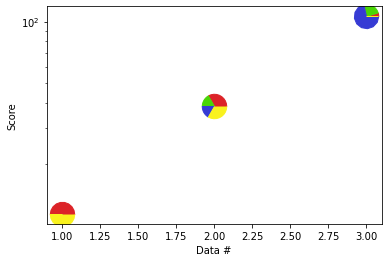

In [21]:
# Teacher
make_piechart_plot(data)

# Exercise 2.3: Optimization

Now you should try to run an optimization to determine how you can best mix the target color. Note that the target color may contain colors different from the 4 you currently have available, and you might thus not be able to reproduce it exactly. 

If you remember back from exercise 1, you often have to do a large number of function calls to get the optimization going. Do not go through all the steps you did in exercise 1 but jump directly to whatever you think worked and will work the best. See if you can produce some nice optimization figures. 

Make sure `eps` is large. Why? Something like 0.3 should do. And please keep in mind, that doing the optimization is bound to be rather crude. Despite our best efforts, a very simple LEGO robot is not really meant for delicate science.

Should the optimizer encounter an error for some reason, rather than starting over form `x0`, start from the last set of inputs the optimizer used.

Note: in exercise 1 you sometimes came across the line "# When LEGO set the next cuvette to 1 here".
You should remember to add in .set_first_empty_cuvette(1). Otherwise you will see failures when you try to restart the optimization.

In [25]:
import numpy as np
from IPython import display

try:
    from scipy.optimize import minimize
except:
    !pip3 install scipy --user --upgrade
    from scipy.optimize import minimize

In [23]:
# For you to play with. Add cells as needed.

You might want to use some of your old data at some point. Even if you no longer have it available in a list in active memory, you can use your old data by loading it from file. You can load in the data you have written to your local data folder. This, however, only contains the data YOU have generated and not that generated by the other group members. You can share the data between you anyway you see fit.

The robot also stores ALL data generated on it. You can ssh directly into the robot from a new gbar session and find your data on the robot. While in there, make sure not to change anything, as we will pull the data from the robot and use it later.

We will not tell you in detail how to get your data, read it into python, and modify it such that you can use it with plotting tools. We trust, that by now and with the wait time you will experience during this exercise, you can figure it out. Stack Overflow is your friend.

One hint though; if you are using mobaxterm, you can ssh directly to the robot using gbar as a gateway ssh server ("Network settings" when creating new session). If you enable SCP or SFTP ("Advanced SSH settings when creating new session), you will be able to see all files in a folder structure and access them as if they were on your machine. The robot host path is "robotname".eduroam.wireless.dtu.dk

In [24]:
# Teacher
lego_mixer_optimize = AiLEGO_master(local_ssh=True, colors=['red_u', 'green_u', 'blue_t', 'yellow_u'])

Input robot nameailego1
Robot password:········
Verify that syringe is at the top positon and the plunger fully pressed. Then press ENTER
Verify that color cartridges are filled and cuvettes empty (#5 can be filled). Then press ENTER
Do you want to test positions? (y/n): y
Are positions okay? (y/n): y


In [32]:
lego_mixer_optimize.set_first_empty_cuvette(1)
lego_mixer_optimize.get_next_cuvette()

1

In [33]:
# Teacher
def root_sum_sqr_err(input1, input2):
    """The sum of squared difference between input colors"""
    dif = np.asarray(input1)- np.asarray(input2)
    return (sum(dif**2)**(0.5))

In [34]:
# TEACHER
data_opt1=[]
data_pie=[]
func_calls=[0]

def find_color2(color_list, func_calls=func_calls):  
    color, target = lego_mixer_optimize.run_cuvette(color_list, read_target=True)
    display.clear_output(wait=True)
    score = root_sum_sqr_err(color, target)
    data_opt1.append(color)
    data_opt1.append(target)
    print(data_opt1)
    data_pie.append([score, color_list])
    print(data_pie)
    plt.axis('off')
    plt.imshow(np.array([data_opt1], dtype=np.uint8))
    make_piechart_plot(data_pie)
    
    func_calls[0] += 1
    if func_calls[0] % 9 == 0:
        input('Have cuvettes other than #5 emptied. Then press Enter')
        lego_mixer_optimize.set_first_empty_cuvette(1)
    return score

[(27, 28, 51), (70, 28, 37), (28, 24, 42), (71, 28, 36), (29, 35, 54), (72, 29, 39), (31, 41, 68), (71, 28, 38), (22, 23, 39), (69, 28, 37), (96, 22, 34), (70, 29, 37), (98, 22, 40), (70, 28, 36), (64, 22, 42), (70, 28, 35), (28, 22, 48), (71, 28, 35), (73, 22, 38), (68, 25, 42), (31, 23, 42), (70, 27, 40), (34, 24, 44), (68, 27, 41), (34, 29, 50), (68, 26, 42), (28, 25, 47), (68, 27, 41), (36, 26, 40), (66, 26, 41), (55, 22, 38), (68, 26, 40), (57, 22, 34), (66, 27, 40), (45, 21, 44), (67, 28, 39), (27, 23, 40), (69, 28, 42), (49, 23, 40), (69, 30, 45), (63, 23, 36), (68, 28, 43), (73, 23, 41), (68, 26, 42), (47, 18, 34), (66, 27, 40), (28, 21, 44), (69, 31, 41), (71, 23, 34), (68, 29, 40), (88, 18, 34), (68, 27, 39), (85, 22, 42), (68, 27, 40), (66, 23, 41), (70, 30, 41), (28, 22, 41), (69, 28, 39), (85, 22, 33), (68, 27, 40), (72, 22, 35), (68, 26, 38), (81, 25, 33), (68, 28, 38), (60, 21, 38), (68, 28, 39), (34, 29, 43), (69, 28, 37), (79, 23, 40), (69, 28, 36)]


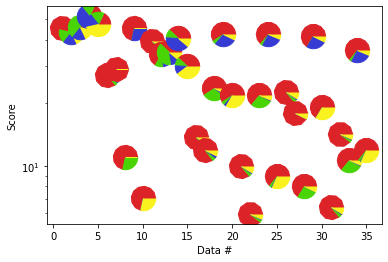

      fun: 6.4031242374328485
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([19.61170653, 10.68488504, 72.80378775, 13.67804462])
  message: b'STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT'
     nfev: 35
      nit: 3
   status: 1
  success: False
        x: array([1.        , 0.04987994, 0.01341234, 0.09845301])

In [35]:
# Teacher
func_calls=[0]

x0 = [0.25, 0.25, 0.25, 0.25]

res = minimize(find_color2, x0, method='L-BFGS-B',
               bounds = 4*[[0.0, 1.0]], 
               options={'disp': True, 'eps': 0.4, 'maxiter': 4, 'gtol': 0.1, 'maxfun':30})
res